In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./dataset.csv')
df.head()

C:\Users\sgadi\AppData\Local\Temp\ipykernel_27884\1251889741.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('./dataset.csv')


,season,route_id,route_variant,direction_id,trip_start_time,day_type_id,day_type_name,stop_name,stop_id,stop_sequence,boardings,alightings,load_,sample_size,ObjectId
0,Fall 2016,1,1-_-0,0,04:37:00,day_type_01,weekday,WASHINGTON ST OPP RUGGLES ST,1,2,0.4,0.3,7.8,13,1
1,Fall 2016,1,1-_-0,0,04:37:00,day_type_01,weekday,ALBANY ST OPP RANDALL ST,10003,5,0.1,0.0,9.4,13,2
2,Fall 2016,1,1-_-0,0,04:37:00,day_type_01,weekday,MASSACHUSETTS AVE @ SIDNEY ST,101,19,0.0,0.4,10.4,13,3
3,Fall 2016,1,1-_-0,0,04:37:00,day_type_01,weekday,MASSACHUSETTS AVE @ PROSPECT,102,20,0.6,2.5,8.5,13,4
4,Fall 2016,1,1-_-0,0,04:37:00,day_type_01,weekday,MASSACHUSETTS AVE @ BIGELOW S,104,21,0.1,0.2,8.4,13,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164802 entries, 0 to 5164801
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   season           object 
 1   route_id         object 
 2   route_variant    object 
 3   direction_id     int64  
 4   trip_start_time  object 
 5   day_type_id      object 
 6   day_type_name    object 
 7   stop_name        object 
 8   stop_id          int64  
 9   stop_sequence    int64  
 10  boardings        float64
 11  alightings       float64
 12  load_            float64
 13  sample_size      int64  
 14  ObjectId         int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 591.1+ MB


In [ ]:
df.describe()

## EDA

In [ ]:
df['route_id'].nunique()

In [ ]:
#### Correlation analysis
df_corr=data.corr()

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, annot=True, cmap="YlGnBu", ax=ax)
plt.show()


#### There are around 220 different route information in our dataset

In [ ]:
grouped_df = df.groupby('route_id')['route_variant'].nunique()

print(grouped_df)

#### We can see that there are multiple route variant for each route id. 
When explored further, we noticed that each route can have multiple variant by making a stop in a particular station or not. 
This forms a new variant of a route. This can have some impact on load on the bus by making a stop or not at a particular bus stop

In [ ]:
df['direction_id'].unique()

#### Direction id has two values 0,1 indicating the direction of bus in opposite sides

In [ ]:
min_time = df['trip_start_time'].min()
max_time = df['trip_start_time'].max()

print(f"Minimum time: {min_time}")
print(f"Maximum time: {max_time}")

#### We can see that there are start times above 23:59. 
As per the data dictionary provided,Trips starting after 11:59 PM are represented as 24:00 plus their 24-hour time. 
For example, a trip starting at 1:30 AM will be 25:30:00. 


In [ ]:
filtered_df = df[(df['trip_start_time'] == '01:30:00') | (df['trip_start_time'] == '25:30:00')]

print(filtered_df)

#### We can see that there are records for both 1:30 and also 25:30 

In [ ]:
# We are removing all the records with 24+ hours format 
df['trip_start_time'] = pd.to_datetime(df['trip_start_time'], format='%H:%M:%S', errors='coerce')

# Remove all records with an invalid time value
df = df[df['trip_start_time'].notnull()]

# Remove all records with a time value greater than 23:59:59
df = df[df['trip_start_time'] <= pd.to_datetime('23:59:59', format='%H:%M:%S')]




In [ ]:
df['day_type_name'].unique()

#### there are 3 unique values for day type name. For simplicity, lets change saturday and sunday to weekend`

In [ ]:
# replace weekend days with 'weekend'
df['day_type_name'].replace(['saturday', 'sunday'], 'weekend', inplace=True)
df['day_type_name'].unique()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164802 entries, 0 to 5164801
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   season           object 
 1   route_id         object 
 2   route_variant    object 
 3   direction_id     int64  
 4   trip_start_time  object 
 5   day_type_id      object 
 6   day_type_name    object 
 7   stop_name        object 
 8   stop_id          int64  
 9   stop_sequence    int64  
 10  boardings        float64
 11  alightings       float64
 12  load_            float64
 13  sample_size      int64  
 14  ObjectId         int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 591.1+ MB


#### Here we observe the distribution of boardings variable 

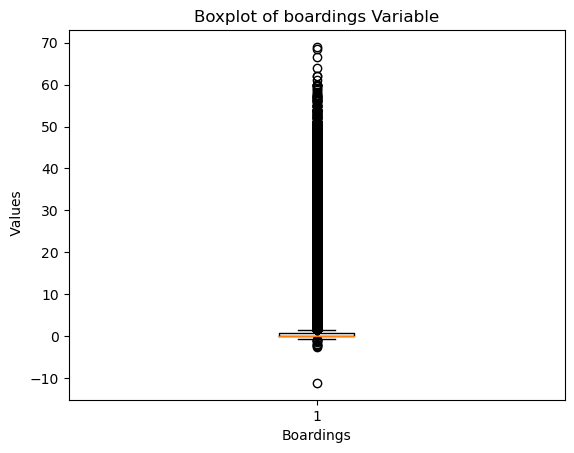

In [5]:
import matplotlib.pyplot as plt

# generate some random data
data = df['boardings']

# create a boxplot
fig, ax = plt.subplots()
ax.boxplot(data)

# set axis labels and title
ax.set_xlabel('Boardings')
ax.set_ylabel(' Values')
ax.set_title('Boxplot of boardings Variable')
plt.show()

#### Here we observe the distribution of alightings variable 

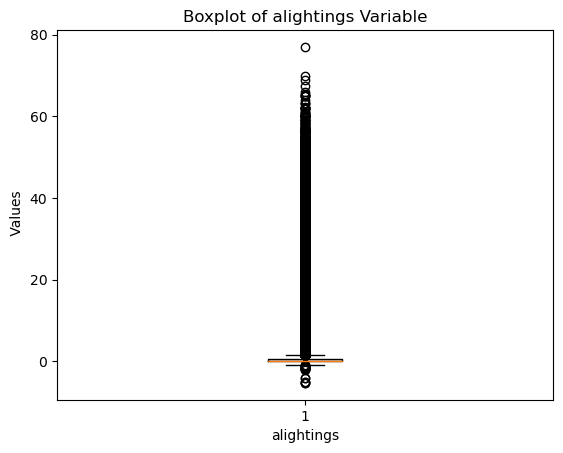

In [6]:
import matplotlib.pyplot as plt

# generate some random data
data = df['alightings']

# create a boxplot
fig, ax = plt.subplots()
ax.boxplot(data)

# set axis labels and title
ax.set_xlabel('alightings')
ax.set_ylabel(' Values')
ax.set_title('Boxplot of alightings Variable')
plt.show()

#### Lets find the distribution of our predictor variable 

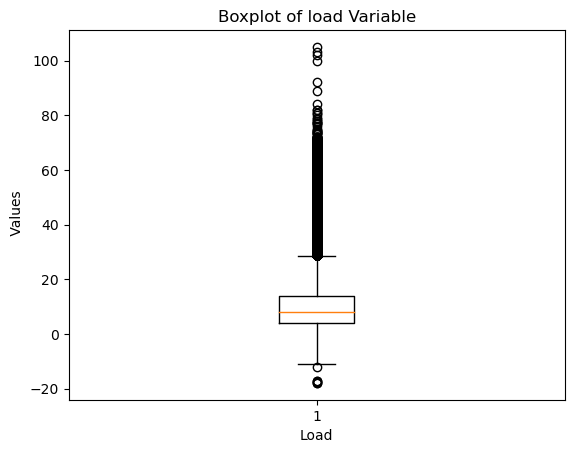

In [7]:
import matplotlib.pyplot as plt

# generate some random data
data = df['load_']

# create a boxplot
fig, ax = plt.subplots()
ax.boxplot(data)

# set axis labels and title
ax.set_xlabel('Load')
ax.set_ylabel(' Values')
ax.set_title('Boxplot of load Variable')
plt.show()

In [ ]:
##we drop the columns which are not significant and repetitive from the nature of the data and domain knowledge
col = [ 'day_type_id','stop_id','sample_size','ObjectId']
df_final = df.copy()
for i in col:
    df_final=df_final.drop(i, axis =1)
    

### Feature engineering

In [ ]:
# Define a function to map peak/non peak hours flag based on the hours information given by MBTA 
#7am-9am and 4pm to 6.30pm is taken as peak hours 

import datetime

def is_peak_hour(time_str):
    time = pd.to_datetime(time_str,format="%H:%M:%S").time()
    if ((time >= pd.Timestamp('7:00:00').time() and time <= pd.Timestamp('8:59:59').time()) or
        (time >= pd.Timestamp('16:00:00').time() and time <= pd.Timestamp('18:29:59').time())):
        return 1
    else:
        return 0


df_final['Peak Hour'] = df_final['trip_start_time'].apply(is_peak_hour)



In [ ]:

import matplotlib.pyplot as plt 
# Group by the peak hour and calculate the mean sales
peak_hour_sales = df_final.groupby('Peak Hour')['load_'].mean()

# Plot the results
peak_hour_sales.plot(kind='bar')
# set the title
plt.title('Average load by Time period')

# show the plot
plt.show()

In [ ]:
df_final.head()

In [ ]:
df_final.info()

In [ ]:
df_final.to_csv('encoded.csv',index=False)

####  Encoding 


In [ ]:

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
encoder = LabelEncoder()

# Convert columns to string type
df_final["season"] = df_final["season"].astype(str)
df_final["day_type_name"] = df_final["day_type_name"].astype(str)
df_final["stop_name"] = df_final["stop_name"].astype(str)
df_final["route_id"] = df_final["route_id"].astype(str)

# Label encode the categorical variables
df_final["season"] = encoder.fit_transform(df_final["season"])
df_final["day_type_name"] = encoder.fit_transform(df_final["day_type_name"])
df_final["stop_name"] = encoder.fit_transform(df_final["stop_name"])
df_final["route_id"] = encoder.fit_transform(df_final["route_id"])
df_final["trip_start_time"] = encoder.fit_transform(df_final["trip_start_time"])



df_final.head()


In [ ]:
##Frequency encoding Route Variant column since it has both string and numerical data 
## it also has large number of unique values. Hence label encoding is not suitable 

# Calculate the frequency of each category in the column
freq = df_final['route_variant'].value_counts(normalize=True)

# Replace each category with its frequency
df_final['route_variant'] = df_final['route_variant'].map(freq)

# Print the encoded DataFrame
df_final.head()

### Modelling

In [8]:
import pandas as pd
df_final=pd.read_csv('./encoded.csv')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variable (y)
X = df_final.drop('load_', axis=1)
y = df_final['load_']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
del(df_final)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)



# Print performance metrics
print("Linear Regression - MSE:", mse_lr, "R2:", r2_lr)




In [ ]:
##Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Create ridge regression model
ridge = Ridge(alpha=0.1)

# Fit model to training data
ridge.fit(X_train, y_train)

# Predict on test data
y_pred = ridge.predict(X_test)

# Compute performance metrics
r2 = ridge.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print performance metrics
print("R^2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)


In [ ]:
##LASSO regression
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error


# Create lasso regression model
lasso = Lasso(alpha=0.1)

# Fit model to training data
lasso.fit(X_train, y_train)

# Predict on test data
y_pred = lasso.predict(X_test)

# Compute performance metrics
r2 = lasso.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print performance metrics
print("R^2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Fit a KNN regressor on the training data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
# Evaluate the KNN regressor on the testing data
knn_predictions = knn.predict(X_test)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2= r2_score(y_test, knn_predictions)

print("KNN MSE:", knn_mse)
print("KNN RMSE:", knn_rmse)
print("KNN R2:", knn_r2)



In [7]:
##decision and radom forest 
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Fit decision tree regression model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
rmse_dtr=np.sqrt(mse_dtr)

# Fit random forest regression model
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr=np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)



print("Decision Tree Regression - MSE:", mse_dtr, "R2:", r2_dtr)
print("Random Forest Regression - MSE:", mse_rfr, "R2:", r2_rfr)
print("Decision Tree Regression - RMSE:",rmse_dtr, "R2:", r2_dtr)
print("Random Forest Regression - RMSE:",rmse_rfr, "R2:", r2_rfr)


Decision Tree Regression - MSE: 15.211226983868432 R2: 0.7885670069785404
Random Forest Regression - MSE: 8.721605400236337 R2: 0.8787714406155598
Decision Tree Regression - RMSE: 3.9001573024518423 R2: 0.7885670069785404
Random Forest Regression - RMSE: 2.9532364280965275 R2: 0.8787714406155598


## From the above, we noticed that Random forest performed the best among all the models that we explored 

### Model understanding using feature importance 
A simple way of understanding the results of a model is to look at feature importances. Feature
importances indicate the importance of a feature within the predictive model, there are several
ways to calculate feature importance, but with the Random Forest classifier, we’re able to extract
feature importances using the built-in method on the trained model. In the Random Forest case,
the feature importance represents the number of times each feature is used for splitting across all
trees.


In [12]:
feature_importances = pd.DataFrame({
'features': X_train.columns,
'importance': rfr.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


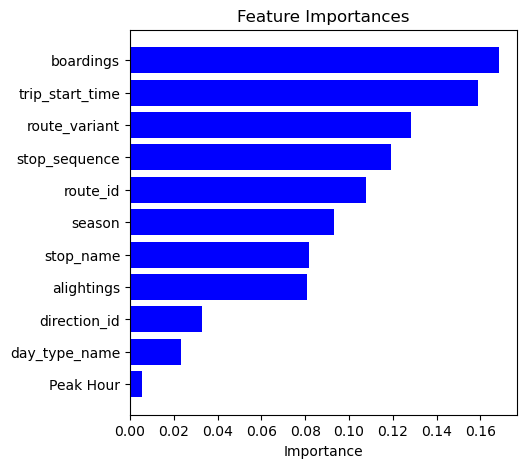

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'],color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()


#### Here we do hyperparameter tuning for random forest with the help of randomizedsearchCv since the dataset is huge

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the random forest model
rf = RandomForestRegressor()

# Define the hyperparameters you want to tune and their respective ranges
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 5, 10, 20],
   # 'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the random search object with the specified parameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=10, cv=3, verbose=4, random_state=42,
                               n_jobs=-1)

# Fit the random search object to the data
rf_random.fit(X_train, y_train)

# Print the best parameters and its score
print("Best Parameters:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 30, 'min_samples_leaf': 4, 'max_depth': None}
Best Score: 0.8481635887669707
